In [33]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../scripts')
import btsc_dataset
from btsc_dataset import resize_image

In [34]:
training_data = btsc_dataset.load_training()

In [35]:
labels = []
images = []
for instance in training_data:
    labels.append(instance['label'])
    images.append(instance['data'])

In [36]:
def first_image_with_label(label): return images[labels.index(label)]

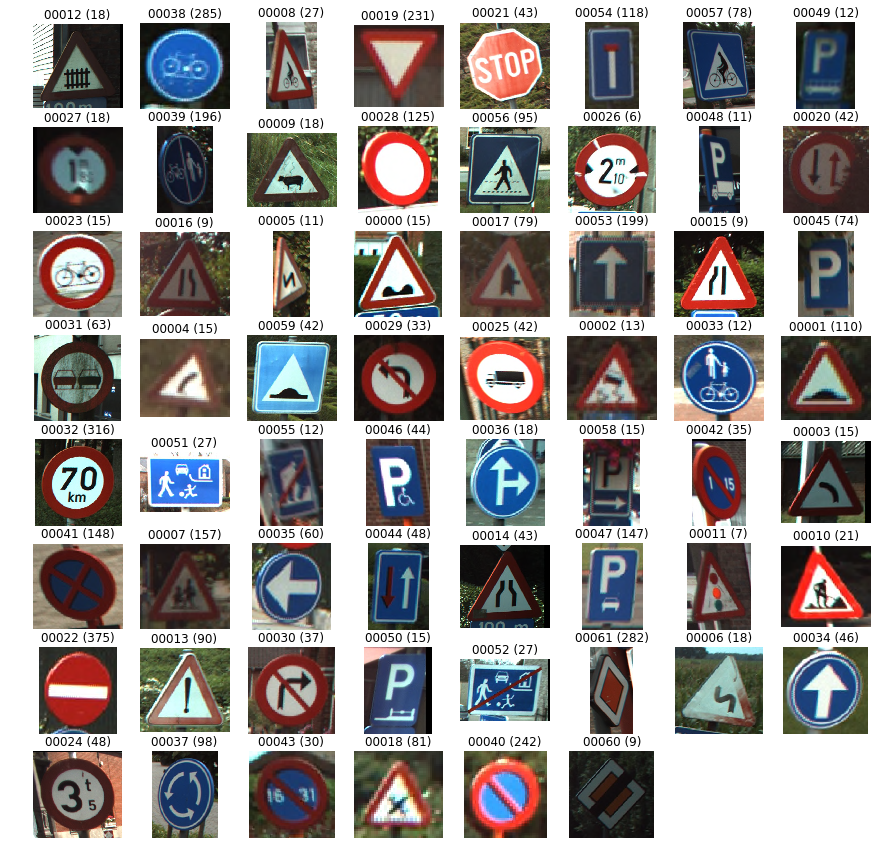

In [37]:
plt.figure(figsize=(15, 15))

unique_labels = set(labels)
for (idx, label) in enumerate(unique_labels, 1):
    plt.subplot(8, 8, idx)
    plt.axis('off')
    plt.title(f'{label} ({labels.count(label)})')
    plt.imshow(first_image_with_label(label))

plt.show()

In [38]:
# TODO: Create plot_images_with_label()

In [39]:
images32 = [resize_image(img, 32) for img in images]

def first_image32_with_label(label): return images32[labels.index(label)]

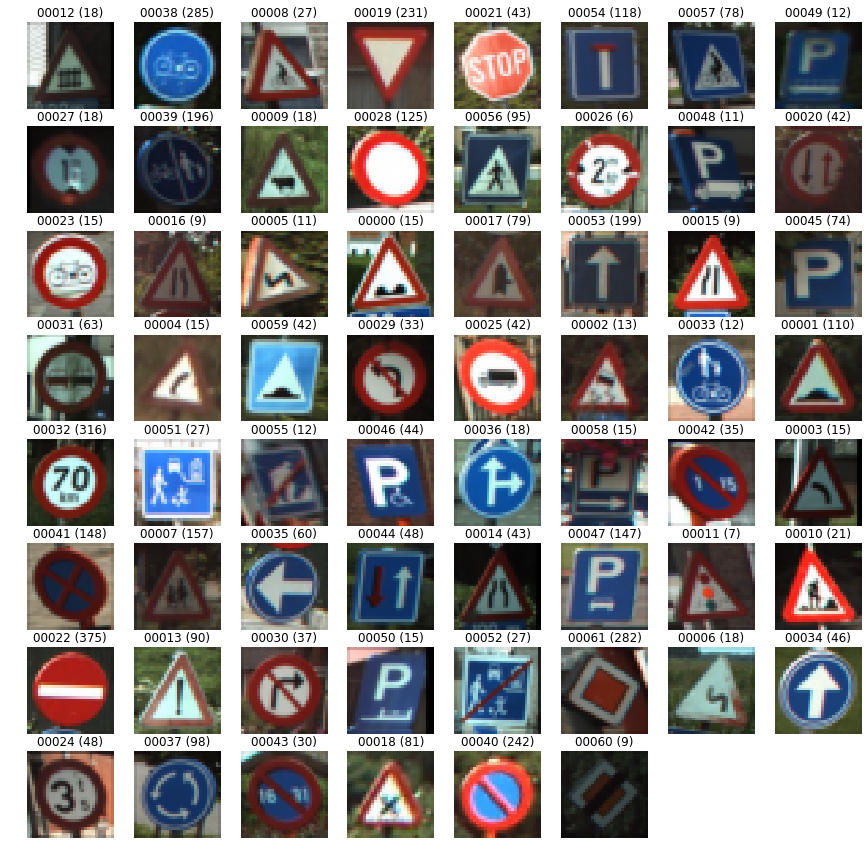

In [40]:
plt.figure(figsize=(15, 15))

unique_labels = set(labels)
for (idx, label) in enumerate(unique_labels, 1):
    plt.subplot(8, 8, idx)
    plt.axis('off')
    plt.title(f'{label} ({labels.count(label)})')
    plt.imshow(first_image32_with_label(label))

plt.show()

In [41]:
print('Total Unique Labels:', len(unique_labels))

Total Unique Labels: 62


In [42]:
len(images32)

4575

In [43]:
# from keras.models import *
# from keras.layers import *

# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(MaxPooling2D())
# model.add(BatchNormalization())

# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# # model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(BatchNormalization())

# # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# #model.add(Dropout(0.3))
# model.add(Dense(62, activation = 'softmax'))

In [51]:
from keras.models import *
from keras.layers import *
from keras.utils  import *

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(62, activation='relu'))
model.add(Dense(62, activation='softmax'))

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Y = np.array(labels)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
categorical_Y = to_categorical(encoded_Y)

X = np.array(images32)

X_train, X_test, Y_train, Y_test = train_test_split(X, categorical_Y, test_size=0.33, random_state=42)

print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print()
print('encoded_Y:', encoded_Y)
print('categorical_Y:', categorical_Y)

(4575, 32, 32, 3)
(4575,)
(3065, 32, 32, 3)
(3065, 62)
(1510, 32, 32, 3)
(1510, 62)

encoded_Y: [ 0  0  0 ... 61 61 61]
categorical_Y: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=5, epochs=10, verbose=1)

Epoch 1/10
3065/3065 [==============================] - 6s 2ms/step - loss: 0.0241 - acc: 0.9948
Epoch 2/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0038 - acc: 0.9990
Epoch 3/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0066 - acc: 0.9990
Epoch 4/10
3065/3065 [==============================] - 5s 2ms/step - loss: 7.8397e-04 - acc: 1.0000
Epoch 5/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0595 - acc: 0.9837
Epoch 6/10
3065/3065 [==============================] - 5s 2ms/step - loss: 0.0059 - acc: 0.9990
Epoch 7/10
3065/3065 [==============================] - 5s 2ms/step - loss: 5.1429e-04 - acc: 1.0000
Epoch 8/10
3065/3065 [==============================] - 5s 2ms/step - loss: 2.5594e-04 - acc: 1.0000
Epoch 9/10
3065/3065 [==============================] - 5s 2ms/step - loss: 1.8972e-04 - acc: 1.0000
Epoch 10/10
3065/3065 [==============================] - 5s 2ms/step - loss: 1.4675e-04 - acc: 1.0000


In [63]:
# testing_data = btsc_dataset.load_testing()

# test_labels = []
# test_images = []
# for instance in testing_data:
#     test_labels.append(instance['label'])
#     test_images.append(instance['data'])
    
# test_images32 = [resize_image(img, 32) for img in test_images]

In [64]:
# Y_test = np.array(test_labels)

# print(len(set(Y_test)))

# # encoder = LabelEncoder()
# # encoder.fit(Y_test)
# encoded_Y_test = encoder.transform(Y_test)
# print(encoded_Y_test)
# categorical_Y_test = to_categorical(encoded_Y_test)

# X_test = np.array(test_images32)

loss, acc = model.evaluate(X_test, Y_test, verbose=1)

print('Loss:', loss)
print('Accuracy:', acc)

1510/1510 [==============================] - 0s 300us/step
Loss: 0.006861558463635405
Accuracy: 0.9973509933774835
